In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats
import pylab as pl

# Display HTML
from IPython.core.display import display, HTML

/var/folders/r0/x6474m9x6lz6ws5r_d9w8k0m0000gn/T/ipykernel_7396/1784462967.py:15: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [17]:
data=pd.read_csv('adm_data.csv')

In [18]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
print(data.shape)

(400, 9)


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


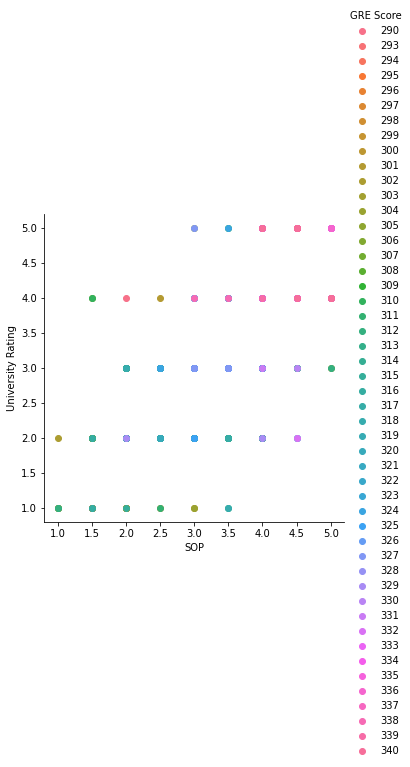

In [22]:
sns.FacetGrid(data,hue='GRE Score',size=5)\
.map(plt.scatter,'SOP','University Rating')\
.add_legend()

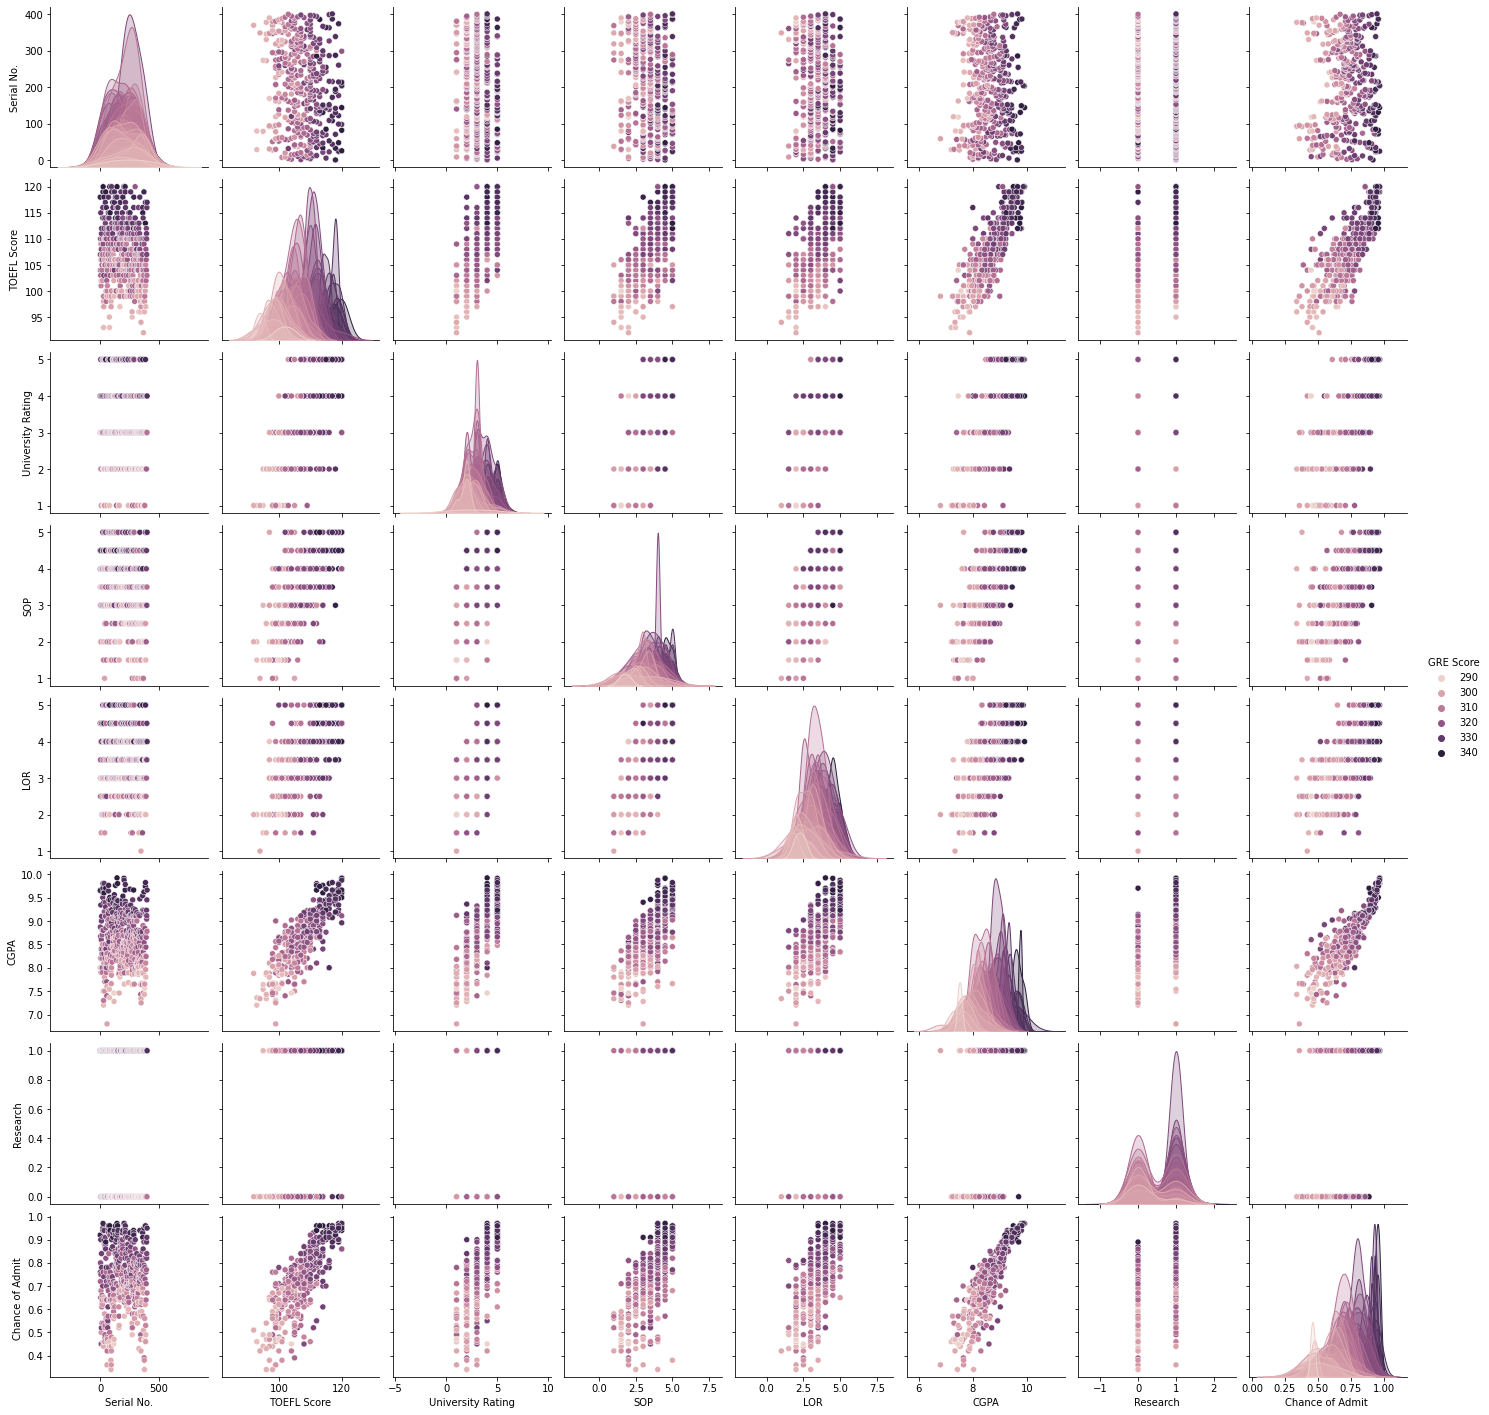

In [23]:
sns.pairplot(data,hue='GRE Score')

In [41]:
X = data.iloc[:, :-1].values    #   X -> Feature Variables
iris.head();
y = data.iloc[:, -1].values #   y ->  Target
print(X)

[[  1.   337.   118.   ...   4.5    9.65   1.  ]
 [  2.   324.   107.   ...   4.5    8.87   1.  ]
 [  3.   316.   104.   ...   3.5    8.     1.  ]
 ...
 [398.   330.   116.   ...   4.5    9.45   1.  ]
 [399.   312.   103.   ...   4.     8.78   0.  ]
 [400.   333.   117.   ...   4.     9.66   1.  ]]


In [42]:
# Splitting the data into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [43]:
#converting object data type into int data type using labelEncoder for Linear reagration in this case

XL = data.iloc[:, :-1].values    #   X -> Feature Variables
yL = data.iloc[:, -1].values #   y ->  Target

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train= le.fit_transform(yL)

print(Y_train)  # this is Y_train categotical to numerical

[54 38 34 42 27 52 37 30 12  7 14 46 40 24 23 16 28 27 25 24 26 32 56 57
 59 56 38  6  8 16 27 36 53 52 56 50 26 20 14 10  8 11 15 49 53 50 48 51
 44 40 38 18 40 34 32 26 26  8  1  4 10  9 16 18 14 17 23 19 30 40 56 58
 55 46 36 34 36 26  6  8 12 58 54 54 56 38 34 28 26 36 26  2  0  6  1  4
 10 48 52 41 33 26 24 19 36 31 49 53 55 30 23 31 24 34 21 28 18  7  9 33
 56 56 19 23 19 26 47 40 46 54 58 39 33 41 51 44 38 33 42 40 46 52 54 59
 42 43 37 45 58 41 55 56 48 41 42 39 32 27 23 14 19 15 29 30 43 40 27 26
 26 27 30 51 48 51 49 47 52 44 34 35 33 33 30 37 34 51 46 55 55 50 52 49
 48 56 39 40 35 35 32 34 35 34 59 59 31 19 25 28 26 30 41 44 57 58 56 55
 53 47 46 36 38 37 38 33 29 23 25 26 33 44 35 36 31 26 53 50 47 48 32 21
 22 27 32 38 25 43 34 33 42 39 36 32 33 55 47 41 38 40 39 52 49 33 32 32
 37 33 34 35 45 39 34 16 11 14 20 40 51 32 28 29 30 42 43 42 56 55 54 51
 44 41 20 18 18 26 23 30 38 48 52 33 24 28 27 35 24 36 41 42 31 32 38 46
 40 29 28 27 16 20 41 42 37 35 34 24 29 43 25 31 42

In [44]:
# This is only for Linear Regretion 
X_trainL, X_testL, y_trainL, y_testL = train_test_split(XL, Y_train, test_size = 0.3, random_state = 0)

In [45]:
from sklearn.linear_model import LinearRegression

modelLR = LinearRegression()
modelLR.fit(X_trainL, y_trainL)

Y_pred = modelLR.predict(X_testL)

In [46]:
from sklearn import metrics
#calculating the residuals
print('y-intercept             :' , modelLR.intercept_)
print('beta coefficients       :' , modelLR.coef_)
print('Mean Abs Error MAE      :' ,metrics.mean_absolute_error(y_testL,Y_pred))
print('Mean Sqrt Error MSE     :' ,metrics.mean_squared_error(y_testL,Y_pred))
print('Root Mean Sqrt Error RMSE:' ,np.sqrt(metrics.mean_squared_error(y_testL,Y_pred)))
print('r2 value                :' ,metrics.r2_score(y_testL,Y_pred))

y-intercept             : -167.02967646821367
beta coefficients       : [ 0.0152985   0.17367571  0.28585678  0.57160363  0.25333863  1.81180701
 11.90754238  2.42898831]
Mean Abs Error MAE      : 4.567100904111694
Mean Sqrt Error MSE     : 39.36457833301874
Root Mean Sqrt Error RMSE: 6.274119725747887
r2 value                : 0.7698425590556947


In [47]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

ValueError: Unknown label type: 'continuous'

In [48]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

ValueError: Unknown label type: 'continuous'

In [49]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

ValueError: Unknown label type: 'continuous'

In [50]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

ValueError: Unknown label type: 'continuous'

In [51]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

ValueError: Unknown label type: (array([0.34, 0.36, 0.38, 0.42, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ,
       0.51, 0.52, 0.53, 0.54, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62,
       0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73,
       0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84,
       0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95,
       0.96, 0.97]),)

In [52]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

ValueError: Unknown label type: 'continuous'

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

ValueError: Unknown label type: (array([0.34, 0.71, 0.91, 0.69, 0.47, 0.92, 0.94, 0.71, 0.74, 0.64, 0.93,
       0.77, 0.61, 0.6 , 0.84, 0.64, 0.84, 0.77, 0.63, 0.65, 0.81, 0.84,
       0.65, 0.59, 0.7 , 0.57, 0.7 , 0.81, 0.88, 0.56, 0.8 , 0.94, 0.79,
       0.62, 0.93, 0.76, 0.78, 0.85, 0.7 , 0.71, 0.8 , 0.79, 0.9 , 0.56,
       0.67, 0.94, 0.74, 0.86, 0.76, 0.47, 0.64, 0.81, 0.73, 0.71, 0.73,
       0.89, 0.93, 0.86, 0.75, 0.84, 0.67, 0.84, 0.71, 0.73, 0.76, 0.79,
       0.54, 0.71, 0.85, 0.54, 0.56, 0.8 , 0.64, 0.44, 0.72, 0.85, 0.7 ,
       0.95, 0.34, 0.75, 0.8 , 0.85, 0.74, 0.58, 0.66, 0.8 , 0.59, 0.88,
       0.69, 0.84, 0.57, 0.97, 0.75, 0.91, 0.65, 0.92, 0.44, 0.69, 0.65,
       0.76, 0.62, 0.58, 0.46, 0.63, 0.94, 0.46, 0.77, 0.89, 0.96, 0.62,
       0.57, 0.96, 0.96, 0.49, 0.71, 0.57, 0.74, 0.53, 0.92, 0.88, 0.91,
       0.47, 0.85, 0.93, 0.64, 0.38, 0.61, 0.79, 0.65, 0.86, 0.66, 0.77,
       0.72, 0.68, 0.69, 0.57, 0.65, 0.78, 0.86, 0.8 , 0.8 , 0.69, 0.62,
       0.63, 0.79, 0.8 , 0.89, 0.64, 0.64, 0.72, 0.66, 0.71, 0.47, 0.68,
       0.79, 0.5 , 0.77, 0.84, 0.9 , 0.72, 0.72, 0.64, 0.82, 0.36, 0.49,
       0.72, 0.76, 0.68, 0.58, 0.54, 0.73, 0.61, 0.76, 0.54, 0.65, 0.96,
       0.93, 0.95, 0.87, 0.92, 0.72, 0.81, 0.9 , 0.53, 0.72, 0.76, 0.36,
       0.67, 0.42, 0.73, 0.65, 0.78, 0.74, 0.82, 0.66, 0.67, 0.64, 0.96,
       0.97, 0.71, 0.77, 0.68, 0.67, 0.7 , 0.67, 0.97, 0.94, 0.94, 0.49,
       0.74, 0.38, 0.92, 0.73, 0.71, 0.56, 0.46, 0.73, 0.78, 0.73, 0.53,
       0.69, 0.51, 0.52, 0.63, 0.52, 0.72, 0.42, 0.84, 0.58, 0.46, 0.75,
       0.68, 0.94, 0.63, 0.97, 0.74, 0.91, 0.78, 0.89, 0.95, 0.82, 0.91,
       0.83, 0.93, 0.72, 0.82, 0.79, 0.81, 0.83, 0.73, 0.76, 0.66, 0.71,
       0.93, 0.71, 0.94, 0.78, 0.94, 0.96, 0.87, 0.46, 0.48, 0.94, 0.66,
       0.64, 0.94, 0.66, 0.56, 0.7 , 0.7 , 0.82, 0.45, 0.81, 0.78, 0.7 ,
       0.62, 0.86, 0.45, 0.89, 0.86]),)

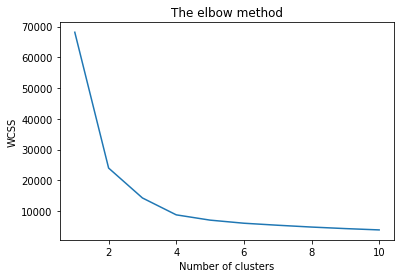

In [54]:
x = iris.iloc[:, [1, 2, 3, 4]].values

#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

In [55]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

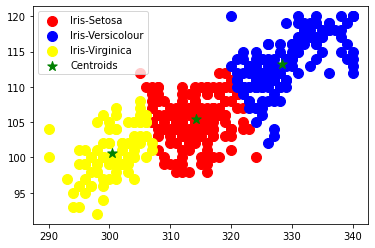

In [56]:
# Visualising the clusters

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-Setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-Versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Iris-Virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'green', label = 'Centroids',marker='*')

plt.legend()

In [57]:
https://www.kaggle.com/code/marcovasquez/top-machine-learning-algorithms-beginner
    


SyntaxError: invalid syntax (1084567906.py, line 1)